In [4]:
import numpy as np
from neuralStellar import *
from datetime import datetime

Data headers = 
['', 'star_mass', 'star_age', 'initial_Yinit', 'initial_feh', 'initial_MLT', 'initial_fov', 'effective_T', 'luminosity', 'delta_nu']


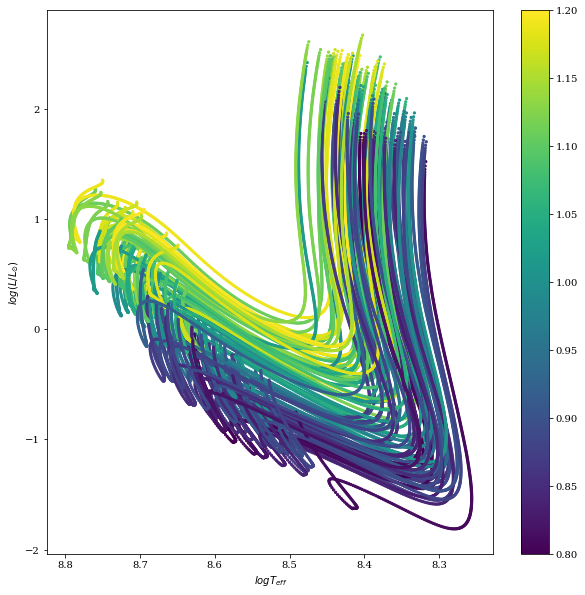

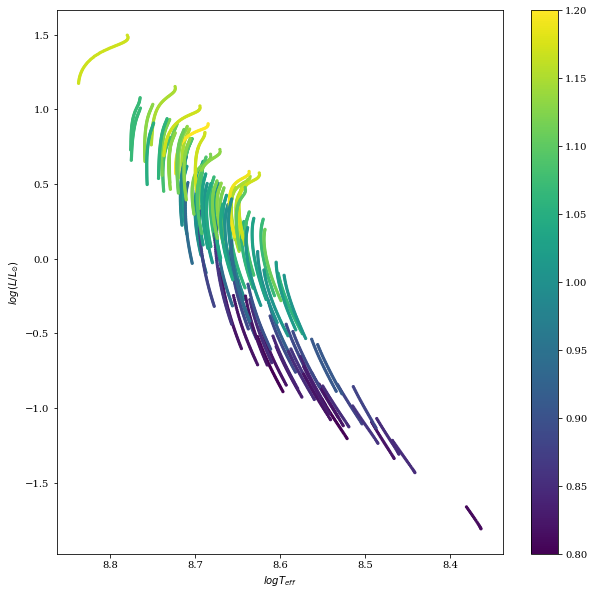

KeyboardInterrupt: 

In [5]:
file='grid_mid_0_0.csv'
mid_grid=neuralStellar(file)
mid_grid.buildIndex()
mid_grid.popIndex(['','star_mass','star_age','effective_T','luminosity'])
mid_grid.initialData(age_range=[1,8])
mid_grid.plotHR1('evo', track_no=100)
mid_grid.plotHR1('ranged', track_no=100)
x_in=mid_grid.fetchData('evo',['mass','age'])
y_out=mid_grid.fetchData('evo',['L','Teff'])
m1=NNmodel('evo')
#m1.buildModel(True,inout_shape=[len(x_in),len(y_out)],no_layers=4,no_nodes=32)
m1.buildModel(False, call_name='mid_grid_model.h5')
m1.compileModel(0.0001,'MAE',metrics=['MAE','MSE'])

In [4]:
epoch_no=100
class showProgress(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % int(epoch_no/100) == 0:
            percent= int(np.round((epoch/int(epoch_no/100)),0))
            time=datetime.now()
            time_lapsed = (time-start_time)
            print(str(percent)+'% | epoch='+str(epoch)+'/'+str(epoch_no)+' | now='+str(time)[:-7]+
                  ' | time lapsed='+str(time_lapsed)[:-7]+' | loss='+str(np.round(logs['loss'],5)))
logdir = "logs\\" + datetime.now().strftime("%Y%m%d-%H%M%S")
#logdir='logs'
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)
            
start_time=datetime.now()
m1.history=m1.model.fit(np.array(x_in).T,np.array(y_out).T,
                  epochs=epoch_no,
                  batch_size=len(x_in[0]),
                  validation_split=0.10,
                  verbose=0,
                  callbacks=[showProgress()])
print('training done! now='+str(datetime.now())+' | Time lapsed='+str(datetime.now()-start_time))
m1.model.save('mid_grid_model_test.h5')

0% | epoch=0/100 | now=2019-11-21 16:04:19 | time lapsed=0:00:07 | loss=0.06049
1% | epoch=1/100 | now=2019-11-21 16:04:22 | time lapsed=0:00:10 | loss=0.04615
2% | epoch=2/100 | now=2019-11-21 16:04:25 | time lapsed=0:00:13 | loss=0.04607
3% | epoch=3/100 | now=2019-11-21 16:04:28 | time lapsed=0:00:16 | loss=0.04612
4% | epoch=4/100 | now=2019-11-21 16:04:31 | time lapsed=0:00:19 | loss=0.04608
5% | epoch=5/100 | now=2019-11-21 16:04:35 | time lapsed=0:00:22 | loss=0.04624
6% | epoch=6/100 | now=2019-11-21 16:04:38 | time lapsed=0:00:25 | loss=0.04644
7% | epoch=7/100 | now=2019-11-21 16:04:41 | time lapsed=0:00:29 | loss=0.04779
8% | epoch=8/100 | now=2019-11-21 16:04:45 | time lapsed=0:00:33 | loss=0.04982
9% | epoch=9/100 | now=2019-11-21 16:04:48 | time lapsed=0:00:36 | loss=0.05109
10% | epoch=10/100 | now=2019-11-21 16:04:52 | time lapsed=0:00:39 | loss=0.04952
11% | epoch=11/100 | now=2019-11-21 16:04:55 | time lapsed=0:00:42 | loss=0.04919
12% | epoch=12/100 | now=2019-11-21 

In [5]:
m1.history=history

final loss =0.04771758
498/1 - 0s - loss: 0.0835 - MAE: 0.0550 - MSE: 0.0063
10139/1 - 0s


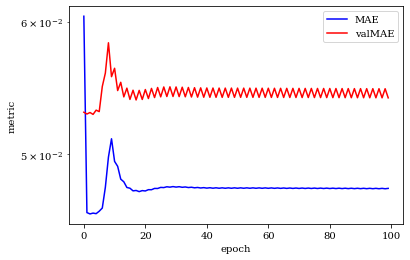

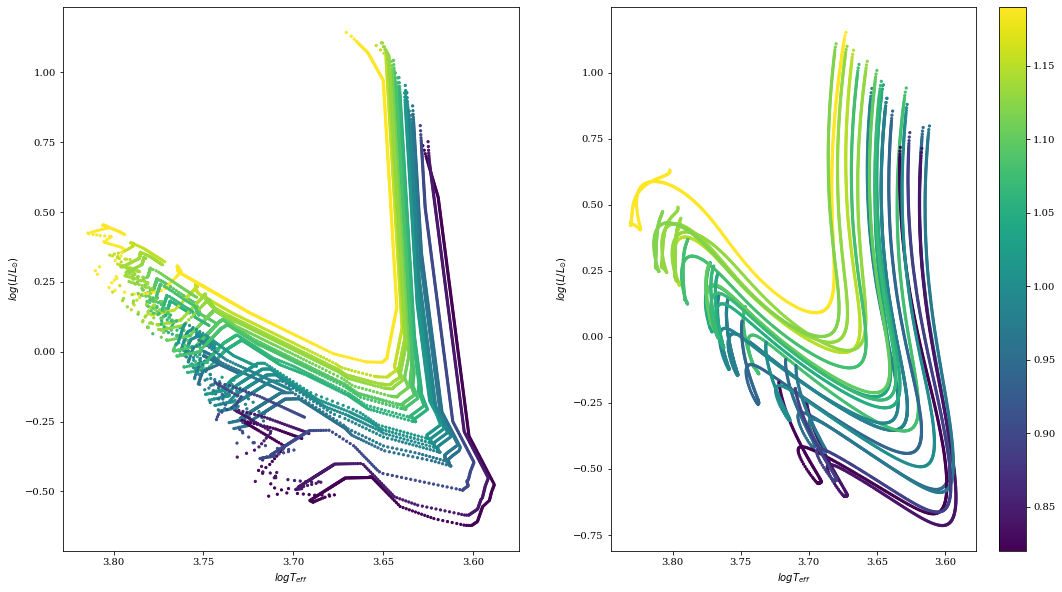

In [7]:
m1.plotHist(plot_MSE=False)
print('final loss ='+str(m1.lastLoss('MAE')))
m1.evalData(mid_grid, 10)
m1.plotHR(mid_grid, 20)

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 2)]               0         
_________________________________________________________________
dense_5 (Dense)              (None, 32)                96        
_________________________________________________________________
dense_6 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_7 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_8 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_9 (Dense)              (None, 2)                 66        
Total params: 3,330
Trainable params: 3,330
Non-trainable params: 0
_________________________________________________________

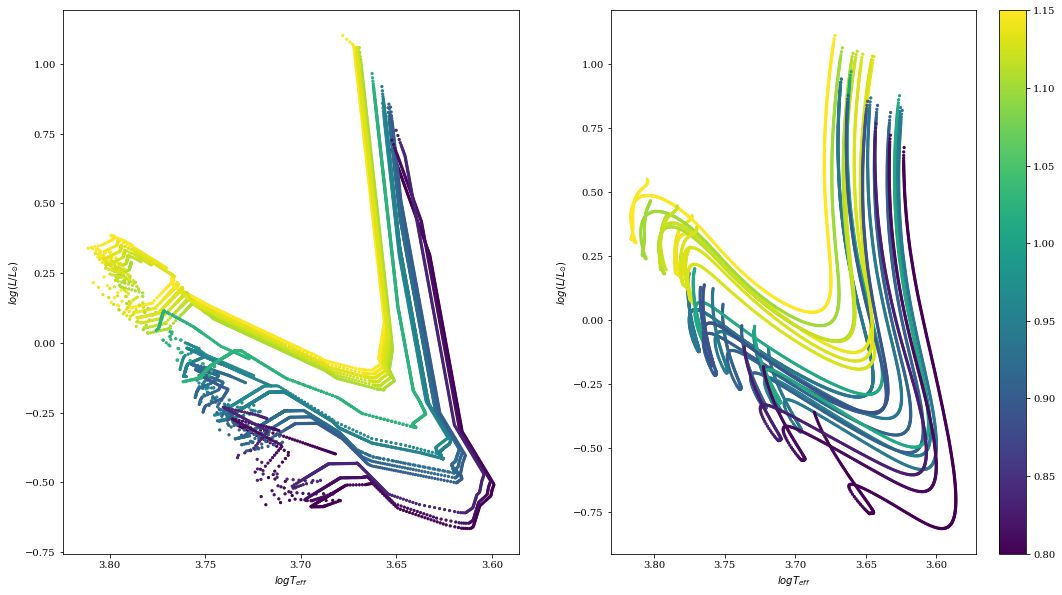

In [7]:
m2=NNModel('evo')
m2.buildModel(False, call_name='mid_grid_model.h5')
m2.plotHR(mid_grid,20)

In [39]:
print(len(x_in[0]))

4310530
